<a href="https://colab.research.google.com/github/itsmahadi007/AI/blob/master/image_recognition_thesis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pre-processing

In [0]:
%tensorflow_version 2.x
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [0]:
'getting access to drive'
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
'Extracting data'
!unzip -qq '/content/drive/My Drive/Colab Notebooks/Datasets/DataSet.zip'

replace DataSet/Classification/Side/Test/bus/test1107.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
from PIL import Image
from pathlib import Path
'Variables for train data'
trainData = []
train_y = []

'Variables for test data'
testData = []
test_y = []

'For lebel taking there name'
vehicles = ['bus', 'car', 'cng', 'rickshaw']

'Getting all the data from the data set'
for target, vehicle in enumerate(vehicles):
    for path in Path('/content/DataSet/Classification/Side/Train/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60))) #geting all the image from that dir and converting them into 60 / 60 image . i reshape it after seeing the minimum size from the image below.
        train_y.append(target)
        trainData.append(image)

    for path in Path('/content/DataSet/Classification/Side/Test/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60)))
        test_y.append(target)
        testData.append(image)

    for path in Path('/content/DataSet/Classification/Top/Train/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60)))
        train_y.append(target)
        trainData.append(image)

    for path in Path('/content/DataSet/Classification/Top/Test/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60)))
        test_y.append(target)
        testData.append(image)

'Converting array into numpy array because transorflow only aceept numpy array and tensor file'
trainData = np.array(trainData)
testData = np.array(testData)
train_y = np.array(train_y)
test_y = np.array(test_y)

print('Number of train data', len(trainData))
print('Number of test data', len(testData))

Number of train data 2521
Number of test data 356


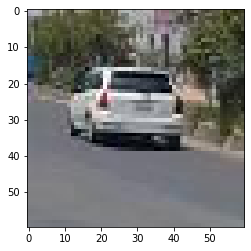

In [0]:
'Vewing any image as i choose to see'
plt.imshow(trainData[800])

In [0]:
"""
'Checking the minimum image size'
minr, minc = np.inf, np.inf

for img in trainData:
    minr = min(minr, img.shape[0])
    minc = min(minc, img.shape[1])

print(minr, minc)"""

60 60


In [0]:
print(trainData[0].shape)

(60, 60, 3)


Building Keras Model

![alt text](https://www.researchgate.net/profile/Maher_Al-Zuhairi/publication/325115367/figure/fig1/AS:631428412878849@1527555673821/The-typical-CNN-model-architecture.png)

We will use famous image classification architectures given in the [link](https://keras.io/applications/)



In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

def model1():
    'Creating a Sequential model'
    model = Sequential()

    'Adding MobileNet V1 layers'
    model.add(MobileNet(input_shape=(60, 60, 3), include_top=False))

    'Flat the image'
    model.add(Flatten())

    'Adding Dense layer'
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    'Adding SoftMax layer'
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
    
    return model

In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

One Hot Encoding

![alt text](https://www.researchgate.net/profile/Jose_Padarian/publication/334507958/figure/fig1/AS:781537293377537@1563344419499/Example-of-two-encodings-of-the-phrase-red-sticky-clay-numerical-encoding-and-one-hot.ppm)

In [0]:
print('Before one-hot-encoding')
print(train_y[0:10], end='\n\n')

print('After one-hot-encoding')
print(y_train[0:10])

Before one-hot-encoding
[0 0 0 0 0 0 0 0 0 0]

After one-hot-encoding
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [0]:
model = model1()

/tensorflow-2.1.0/python3.6/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
history = model.fit(trainData, y_train, epochs=20, 
          batch_size = 64, validation_data = (testData, y_test))

Train on 2521 samples, validate on 356 samples
Epoch 1/20
2521/2521 [==============================] - 4s 2ms/sample - loss: 0.3240 - acc: 0.8774 - val_loss: 6.3969 - val_acc: 0.2837
Epoch 2/20
2521/2521 [==============================] - 1s 540us/sample - loss: 0.0584 - acc: 0.9821 - val_loss: 1.4106 - val_acc: 0.5983
Epoch 3/20
2521/2521 [==============================] - 1s 534us/sample - loss: 0.0450 - acc: 0.9869 - val_loss: 1.2186 - val_acc: 0.6910
Epoch 4/20
2521/2521 [==============================] - 1s 545us/sample - loss: 0.0329 - acc: 0.9917 - val_loss: 0.5042 - val_acc: 0.8483
Epoch 5/20
2521/2521 [==============================] - 1s 539us/sample - loss: 0.0405 - acc: 0.9901 - val_loss: 0.1665 - val_acc: 0.9298
Epoch 6/20
2521/2521 [==============================] - 1s 548us/sample - loss: 0.0188 - acc: 0.9960 - val_loss: 0.0427 - val_acc: 0.9888
Epoch 7/20
2521/2521 [==============================] - 1s 535us/sample - loss: 0.0184 - acc: 0.9940 - val_loss: 0.0140 - val_a

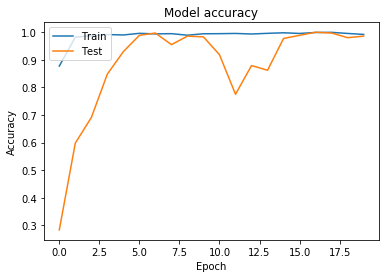

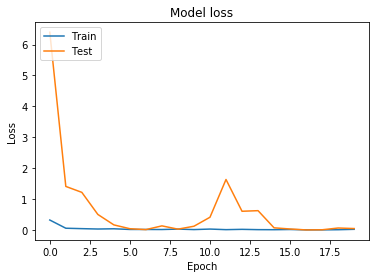

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save('savedModel.h5')

In [0]:
from tensorflow.keras.models import load_model
loaded_model = load_model('savedModel.h5')

In [0]:
loaded_model.predict(testData[120:150]).argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1])

In [0]:
loaded_model.evaluate(testData, y_test)

356/356 [==============================] - 1s 3ms/sample - loss: 0.0482 - acc: 0.9860


[0.04820961465636079, 0.98595506]